In [1]:
"""
로지스틱 회귀


길이, 높이, 두께, 대각선 길이와 무게 까지 특성을 이용
로지스틱 회귀로 접근하기전 
k - 최근접 이웃은 주변 이웃을 찾아주니까 이웃의 클래스 비율을 확률이라고 출력하는 방식으로 해봄
"""
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
"""
어떤 종류의 생선이 있는지 speices 열에서 고유한 값을 추출
"""
print(pd.unique(fish["Species"]))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [3]:
"""
데이터프레임에서 speices 열을 타깃으로 만들고 
나머지 5개의 열은 입력 데이터로 사용함

데이터프레임에서 원하는 열을 리스트로 나열
Species열을 빼고 나머지 5개 열을 선택
"""
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
print(fish_input)
print(fish_input.shape)

[[2.42000e+02 2.54000e+01 3.00000e+01 1.15200e+01 4.02000e+00]
 [2.90000e+02 2.63000e+01 3.12000e+01 1.24800e+01 4.30560e+00]
 [3.40000e+02 2.65000e+01 3.11000e+01 1.23778e+01 4.69610e+00]
 [3.63000e+02 2.90000e+01 3.35000e+01 1.27300e+01 4.45550e+00]
 [4.30000e+02 2.90000e+01 3.40000e+01 1.24440e+01 5.13400e+00]
 [4.50000e+02 2.97000e+01 3.47000e+01 1.36024e+01 4.92740e+00]
 [5.00000e+02 2.97000e+01 3.45000e+01 1.41795e+01 5.27850e+00]
 [3.90000e+02 3.00000e+01 3.50000e+01 1.26700e+01 4.69000e+00]
 [4.50000e+02 3.00000e+01 3.51000e+01 1.40049e+01 4.84380e+00]
 [5.00000e+02 3.07000e+01 3.62000e+01 1.42266e+01 4.95940e+00]
 [4.75000e+02 3.10000e+01 3.62000e+01 1.42628e+01 5.10420e+00]
 [5.00000e+02 3.10000e+01 3.62000e+01 1.43714e+01 4.81460e+00]
 [5.00000e+02 3.15000e+01 3.64000e+01 1.37592e+01 4.36800e+00]
 [3.40000e+02 3.20000e+01 3.73000e+01 1.39129e+01 5.07280e+00]
 [6.00000e+02 3.20000e+01 3.72000e+01 1.49544e+01 5.17080e+00]
 [6.00000e+02 3.20000e+01 3.72000e+01 1.54380e+01 5.580

In [4]:
"""
fish_input에 5개의 특성이 잘 저장됨
"""
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
"""
입력 데이터 준비 되었으니까
동일한 방법으로 타깃 데이터 생성
"""
fish_target = fish["Species"].to_numpy()
print(fish_target)
print(fish_target.shape)

['Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach' 'Roach'
 'Roach' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish' 'Whitefish'
 'Whitefish' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki'
 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Parkki' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'
 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch' 'Perch'

In [6]:
"""
이제 훈련세트와 테스트 세트 생성
"""
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
fish_input, fish_target, random_state =42)

In [7]:
"""
훈련 세트, 테스트 세트
데이터 표준화 전처리

"""
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [8]:
"""
k- 최근접 이웃 분류기의 확률 예측

KNeighborsClassifier 클래스 객체를 만들고 훈련 세트로 모델을 훈련한 다음
훈련 세트와 테스트 세트의 점수를 확인
최근접 이웃 개수인 k를 3으로 지정
"""
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [9]:
"""
클래스 확률을 배우는 것이 목적이라 
훈련 세트와 테스트 세트 점수에 대해서는 잠시 보류

이렇게 타깃 데이터에 2개 이상의 클래스가 포함된 문제를 다중 분류
"""
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [10]:
"""
테스트 세트에 있는 처음 5개의 샘플의 타깃값을 예측해봄
"""
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [11]:
"""
5개 샘플에 대한 예측은 어떤 확률로 만들어졌을까요? 사이킷런의 분류 모델은 predict_proba()메서드로 
클래스별 확률값을 반환함
테스트 세트에 있는 처음5개의 샘플에 대한 확률을 출력해봄

-넘파이 round()함수는 기본으로 소수점 첫번째 자리에서 반올림을 하는데
decimals 매개변수로 유지할 소수점 아래 자릿수를 지정할 수 있다
"""
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [12]:
"""
predict_proba() 메서드의 출력 
첫 번쨰 열이 "Bream"에 대한 확률, 두번째 열이 "Parkki"에 대한 확률

네 번째 샘플의 최근접 이웃의 클래스를 확인

이 샘플의 이웃은 다섯 번째 클래스인 "Roach"가 1개
세 번째 클래스인 "Perch"가 2개 

즉 다섯번째 클래스에 대한 확률은 1/3 임
세 번째 클래스에 대한 확률은 2/3

하지만 확률이라고 하기에는 범위가 0/3, 1/3, 2/3, 3/3 이 전부인 모습
더 좋은 방법으로 로지스틱 회귀를 사용
"""
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


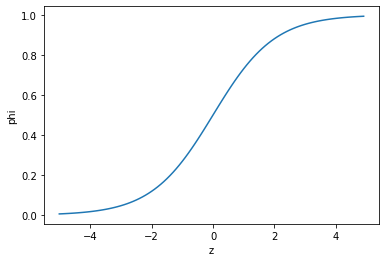

In [13]:
"""
로지스틱 회귀
로지스틱 회귀는 이름은 회귀지만 분류 모델이다
시그모이드함수 (또는 로지스틱 함수)를 사용함

쉽게 설명하면 0~1을 부드럽게 변하는 함수
전자 신호처럼 0아니면 1이 아니라 0과1사이를 부드럽게 변하는 함수

0일때는 0.5를 표현하는 시그모이드 함수

넘파이를 활용한 시그모이드함수 표현
"""
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1)
phi = 1 / (1+ np.exp(-z))
plt.plot(z, phi)
plt.xlabel("z")
plt.ylabel("phi")
plt.show()

In [14]:
"""
로지스틱 회귀 모델인 LogisticRegression클래스가 있다

훈련하기전에 간단한 이진 분류를 수행, 이진 분류일 경우 시그모이드 함수의 출력이
0.5보다 크면 양성 클래스
0.5보다 작으면 음성 클래스로 분류
도미와 빙어 2개를 사용해서 이진 분류를 수행


넘파이 배열은 True, False 값을 전달하여 행을 선택할 수 있다
이를 불리언 인덱싱
"""
#불리언 인덱싱 예시
char_arr = np.array(["A", "B", "C", "D", "E"])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [15]:
"""
불리언 인섹싱으로 
훈련 세트에서 도미(Bream)와 빙어(Smelt)의 행만 골라램
비교 연산자를 사용하면 도미와 빙어의 행을 모두 True로 만들 수 있다

도미와 빙어 데이터만 골라냄
"""
bream_smelt_indexes = (train_target == "Bream") | (train_target == "Smelt")
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [16]:
"""
도미와 빙어 데이터로 로지스틱 회귀 모델을 훈련해봄
Logistic Regression 클래스는 선형 모델이므로 sklearn.linear_model 패키지 이용
"""
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [17]:
"""
5개 샘플 예측
"""
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [18]:
"""
예측 확률 predict_proba() 메서드로 
5개의 샘플의 예측 확률 출력

"""
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [19]:
"""
샘플마다 2개의 확률 출력 확인
첫번째 열이 음성클래스(0)에 대한 확률
두번째 열이 양성클래스(1)에 대한 확률
어떤것이 양성 클래스 인지 확인 
어떤것이 음성클래스 인지 확인

사이킷런은 타깃값을 알파벳순으로 정렬하여 사용
classes_속성으로 확인
"""
print(lr.classes_)

['Bream' 'Smelt']


In [20]:
#테스트용
print(train_bream_smelt)

print(target_bream_smelt)

[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [ 0.63818253  0.56257661  0.73223951  1.64473401  0.50705737]
 [ 0.30041219  0.23459067  0.42823457  1.36042157  0.22329758]
 [ 0.9027693   0.70314202  0.88858491  1.89027545  0.85537174]
 [-1.0824759  -1.61150165 -1.62162731 -1.7000674  -1.92815631]
 [ 0.10337949  0.04717013  0.23714575  0.88445197  0.41799764]
 [ 1.49668216  1.03112796  1.21864741  2.44274986  1.40289707]
 [ 0.23004337  0.23459067  0.42823457  1.3336029   0.39983213]
 [-0.42579405 -0.29018684 -0.11028847  0.65627104 -0.26107519]
 [ 1.28557569  0.70314202  0.89727076  1.98228866  1.06683526]
 [ 0.93373158  0.60943175  0.83646978  1.85150445  0.97832415]
 [ 0.80706771  0.60943175  0.81041221  1.63137406  1.0255057 ]
 [-1.07262426 -1.52716241 -1.55214047 -1.67235972 -1.86207776]
 [ 1.6374198   1.17169337  1.27076255  2.41341232  1.40143407]
 [-1.07966115 -1.63961473 -1.67374245 -1.6462819  -1.87

In [21]:
"""
빙어(smelt)가 양성 클래스 확인
predict_proba()메서드가 반환한 배열 값을 보면
두번째 샘플만 양성 클래스인 빙어(smelt)의 확률이 높다
나머지는 모두 도미(Bream)으로 예측

로지스틱 회귀로 성공적인 이진 분류 수행
선형 회귀에서 처럼 로지스틱 회귀가 학습한 계수를 확인
"""
print(lr.coef_, lr.intercept_)


[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [22]:
"""
LogisticRegression 클래스는 decision_function()메서드로 
z값을 출력할수 있다
train_bream_smelt의 처음 5개 샘플의 z값을 출력
"""
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [23]:
"""
이 z값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다
파이썬의 사이파이 라이브러리에도 시그모이드 함수가 있다
expit()
np.exp()함수를 사용해 분수 계산을 하는 것보다 편리하고 안전함
decisions 배열의 값을 확률로 변환

출력된 값을 보면 predict_proba()메서드 출력의 두 번째 열의 값과 동일
즉 decision_function() 메서드는 양성 클래스에 대한 z값을 반환
"""
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


In [24]:
"""
로지스틱 회귀로 다중 분류 수행하기

여기에서 LogisticRegression 클래스를 사용해 7 개의 생선을 분류해 보면서 이진 분류와의 차이점을 알아보자

LogisticRegression 클래스는 기본적으로 반복적인 알고리즘을 사용함 
max_iter 매개변수에서 반복 횟수를 지정하며 기본값은 100
하지만 반복횟수가 부족하다는 경고가 발생함, 그래서 반복 횟수를 1000으로 줌

Logisticregression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규제함
이런 규제를 L2 규제라고도 부름
릿지 회쉬에서는 alpha 매개변수로 규제의 양을 조절
alpha 가 커지면 규제도 커짐 
Logisticregression 에서 규제를 제어하는 매개변수는 임
하지만 C는 alpha와 반대로 작을수록 규제가 커짐
C의 기본값은 1

규제를 조금 완화하기 위해 20으로 늘림

LogisticRegression 클래스로 다중 분류 모델을 훈련하는 코드
7개의 생선 데이터가 들어 있는 train_scaled와 train_target을 사용
"""
lr = LogisticRegression( C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [25]:
"""
과대 적합이나 과소 적합이 일어나진 않음
5개의 샘플에 대한 예측을 출력
"""
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [26]:
"""
테스트 세트의 처음 5개 샘플에 대한 예측 확률을 출력
소수점 네번째 자리에서 반올림

5개의 샘플에 대한 예측이므로 5개의 행이 출력
7개의 생선에 대한 확률을 계산했으므로 7개의 열이 출력됨
"""
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [27]:
"""
클래스 정보 확인
"""
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [28]:
"""
다중 분류의 선형 방정식 모습

5개의 특성을 사용함 coef_ 배열의 열은 5개 그런데 행이 7
intercept_은 7개
z를 7개를 계산함 
다중 분류 클래스 마다 z값을 하나씩 계산한다는 뜻

가장 높은 z값을 출력하는 클래스가 예측 클래스가 됨

확률 계산은 소프트맥스 함수를 사용해서 계산한것임
다중분류는 소프트맥스 함수를 사용하여 7개의 Z값을 확률로 변환함

"""
print(lr.coef_, lr.intercept_)
print(lr.coef_.shape, lr.intercept_.shape)

[[-1.49003025 -1.02920916  2.59352663  7.70353339 -1.20067499]
 [ 0.19619603 -2.01058441 -3.77984188  6.50489846 -1.99487383]
 [ 3.56278059  6.34362554 -8.48973941 -5.75756019  3.7930946 ]
 [-0.10458825  3.60315886  3.93067299 -3.61729947 -1.75070954]
 [-1.40058388 -6.0750575   5.25967252 -0.87223581  1.8604376 ]
 [-1.38529379  1.49218046  1.39228892 -5.67732313 -4.40095538]
 [ 0.62151954 -2.32411379 -0.90657977  1.71598675  3.69368154]] [-0.09204778 -0.26290681  3.25100913 -0.14741927  2.65495374 -6.78780461
  1.3842156 ]
(7, 5) (7,)


In [29]:
"""
이진 분류에서처럼 decision_function() 메서드로 z1~z7 까지의 값을 구한 다음
소프트맥스 함수를 사용해 확률로 바꿔봄
테스트 세트의 처음5개 샘플에 대한 z1~z7의 값을 구함
"""
decision=lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [30]:
"""
사이파이 소프트맥스 함수를 사용함
"""
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
